# Homework 2: Simple Stock Analysis

The objective of this homework is to practice working with **Pandas Series**. To successfully complete this homework, you may use any resources available to you.

You need to accomplish the following tasks:
1. Download the Apple stock data for the timeframe of 1982 to today.
1. Use the %magic command to activate inline matplotlib graphs
2. Provide an overview of the `Close` series of the Apple stock.
3. Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?
3. Find the timeframes with the highest stock price surge in five days. Can you explain why these five dates?
4. Resample the `Close` series to represent business quarters with a financial year that ends in September.
3. Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. Can you explain why the larges surge happened? Visualize it.

If you use tutorials/code snippets that you find on the internet to complete this task, make sure that you reference them. Also make sure that the Jupyter notebook is free of mistakes, well-documented, and professionally formatted before you submit it.

This homework is due on **Tuesday, 23 2018**.

Lets' make sure that we allow multiple outputs.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Install the [pandas-datareader package](https://pandas-datareader.readthedocs.io/en/latest/). This package allows you to obtain stock information.

In [ ]:
!pip install pandas-datareader

* Write a function that has the ticker symbol and the start/enddate as input and that returns a dataframe with the stock information.
* Use the function to get the stock information for Apple from 1982 to today.

In [5]:
import pandas_datareader as pdr
from pandas_datareader._utils import RemoteDataError
from datetime import datetime

ticker_symbol = "AAPL"

def get_stock_data(x,start_year, end_year):
    start = datetime(start_year, 1, 1)
    end = datetime(end_year, 12, 31)
    try:
        f = pdr.DataReader(x, "yahoo", start, end)
        #f = pdr.DataReader("WIKI/"+x, 'quandl', start, end)
        f['symbol'] = x
        return f
    except RemoteDataError:
        print("404,",x)

stock = get_stock_data(ticker_symbol, 1982, 2017)

Use the %magic command to activate inline matplotlib graphs and plot the `Close` series.

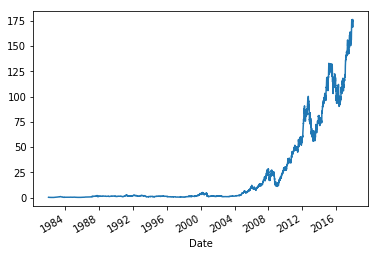

In [6]:
%matplotlib inline
stock.Close.plot();

Provide an overview of the Close series of the Apple stock.

In [7]:
stock.Close.describe()

count    9078.000000
mean       22.547216
std        39.303114
min         0.196429
25%         1.090179
50%         1.669643
75%        23.260000
max       176.419998
Name: Close, dtype: float64

Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?

In [8]:
a = stock[stock.Close == stock.Close.max()]
b = stock.Close[stock.Close.values==172.90]
c = stock.Close.idxmax()

In [9]:
type(a)
type(b)
type(c)

pandas.core.frame.DataFrame

pandas.core.series.Series

pandas._libs.tslib.Timestamp

Find the five timeframes with the highest stock price surge in five days (in % compared to the closing cost of the previous trading day). Do you notice something? Can you explain what happend during the timeframes?

## Solution using shift

In [10]:
percentRise = (stock.Close - stock.Close.shift(5))/stock.Close.shift(5)
percentRise.nlargest(5)

Date
1997-08-07    0.667858
1997-08-06    0.514388
1998-01-06    0.442857
1997-08-08    0.397393
1998-01-08    0.385715
Name: Close, dtype: float64

In [11]:
stock.Close['1997-08-01':'1997-08-10']

Date
1997-08-01    0.685268
1997-08-04    0.705357
1997-08-05    0.705357
1997-08-06    0.939732
1997-08-07    1.042411
1997-08-08    0.957589
Name: Close, dtype: float64

## Solution using pct_change

In [14]:
stock.Close.pct_change(5).nlargest(5)

Date
1997-08-07    0.667858
1997-08-06    0.514388
1998-01-06    0.442857
1997-08-08    0.397393
1998-01-08    0.385715
Name: Close, dtype: float64

Microsoft saved Apple during this timeperiod ([Link](https://www.wired.com/2009/08/dayintech_0806/)).

Resample the Close series to represent business quarters with a financial year that ends in September.

In [192]:
quarterly_stock = stock.Close.resample('BQ-SEP').mean()

Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. 
Can you explain why the largest surge happened?.

In [194]:
window = 4
percentage = 1

r = quarterly_stock.rolling(window).min()

In [195]:
gain = (quarterly_stock - r) / r >= percentage

In [196]:
((quarterly_stock[gain] - r[gain]) / r[gain] * 100).nlargest(5)

Date
1983-06-30    244.412806
2005-03-31    175.793597
1983-03-31    174.650733
2000-03-31    167.956777
1987-09-30    155.883120
Name: Close, dtype: float64

* 1983: John Sculley becomes the CEO of Apple and Apple began to ship the [Lisa](https://en.wikipedia.org/wiki/Apple_Lisa), which turned out to be overhyped.
* 1987: Apple began to ship the Mac II.
* 2000: Apple fills its product matrix with the iBook and announced its internet strategy
* 2005: iPod at its peak.
Source: [http://apple-history.com](http://apple-history.com)

Visualize the stock price for the quarters with the highest price surge.

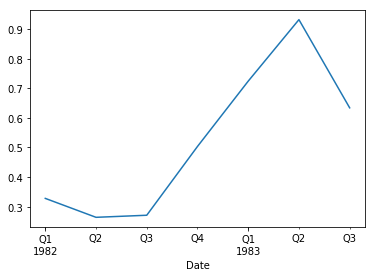

In [183]:
quarterly_stock[:'1983-09-30'].plot();